# <font color='Blue'>Deep Learning - Multi-Label Classification - II</font>

# <font color='Blue'>Classification</font>

Multi-label classification involves predicting zero or more class labels.

Unlike normal classification tasks where class labels are mutually exclusive, multi-label classification requires specialized machine learning algorithms that support predicting multiple mutually non-exclusive classes or “labels.”

## <font color='Blue'>Learning Objectives</font>
  1. Apply Deep Learning to a Multi-Label Classification Problem

## <font color='Blue'>Importing Libraries</font>

In [32]:
import keras
keras.__version__

'2.3.1'

In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [34]:
np.set_printoptions(suppress=True)

### <font color='Blue'>1.0 Dataset </font>

In [49]:
df = pd.read_csv("dataset-tags.csv")

In [50]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1,0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0,1
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0,1
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0,1
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0,1


### <font color='Blue'>1.1 Data Preprocessing </font>

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
!pip install neattext

In [53]:
import neattext as nt
import neattext.functions as nfx

### <font color='Blue'>1.1.1 Exploring Dataset for Noise </font>

In [54]:
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

### <font color='Blue'>1.1.2 Extracting Stop Words </font>

In [55]:
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

### <font color='Blue'>1.1.3 Removing Stop Words </font>

In [56]:
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

### <font color='Blue'>1.1.4 Saving the Corpus </font>

In [57]:
corpus = df['title'].apply(nfx.remove_stopwords)

### <font color='Blue'>1.2 Feature Engineering </font>

In [58]:
tfidf = TfidfVectorizer()

In [59]:
X = tfidf.fit_transform(corpus).toarray()

In [60]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
Y = (df[['mysql', 'python', 'php']])
Y

,mysql,python,php
0,1,1,0
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
139,1,1,0
140,1,1,0
141,1,0,1
142,0,0,1


### <font color='Blue'>1.2 Splitting into Train and Validation Sets </font>

In [62]:
train_data, test_data, train_targets, test_targets = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

In [63]:
train_targets = train_targets.to_numpy()
test_targets = test_targets.to_numpy()

### <font color='Blue'>1.3 Building (Defining our Network) </font>

### <font color='Blue'>How should we approach this ?</font>

<img src="Activation Function Last Layer.jpg" width=800 height = 600>   

In [64]:
from keras import models
from keras import layers

In [65]:
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Define the Architecture such that

    1.Number of nodes in the output layer matches the number of labels.
    2.Sigmoid activation for each node in the output layer.
    3.Binary cross-entropy loss function.

### <font color='Blue'>1.8 Fitting our Model </font>

In [66]:
hist = model.fit(train_data, train_targets,
                             epochs=10,
                             batch_size=32,verbose=2,
                             validation_data=(test_data, test_targets))

Train on 100 samples, validate on 44 samples
Epoch 1/10
 - 0s - loss: 0.6898 - accuracy: 0.5633 - val_loss: 0.6909 - val_accuracy: 0.5833
Epoch 2/10
 - 0s - loss: 0.6843 - accuracy: 0.6433 - val_loss: 0.6879 - val_accuracy: 0.6061
Epoch 3/10
 - 0s - loss: 0.6801 - accuracy: 0.6500 - val_loss: 0.6848 - val_accuracy: 0.6212
Epoch 4/10
 - 0s - loss: 0.6756 - accuracy: 0.6467 - val_loss: 0.6830 - val_accuracy: 0.6212
Epoch 5/10
 - 0s - loss: 0.6721 - accuracy: 0.6700 - val_loss: 0.6807 - val_accuracy: 0.6288
Epoch 6/10
 - 0s - loss: 0.6682 - accuracy: 0.6667 - val_loss: 0.6787 - val_accuracy: 0.6212
Epoch 7/10
 - 0s - loss: 0.6644 - accuracy: 0.6833 - val_loss: 0.6762 - val_accuracy: 0.6212
Epoch 8/10
 - 0s - loss: 0.6599 - accuracy: 0.6800 - val_loss: 0.6734 - val_accuracy: 0.6212
Epoch 9/10
 - 0s - loss: 0.6552 - accuracy: 0.6833 - val_loss: 0.6704 - val_accuracy: 0.6364
Epoch 10/10
 - 0s - loss: 0.6507 - accuracy: 0.7033 - val_loss: 0.6680 - val_accuracy: 0.6364


In [67]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### <font color='Blue'>1.9 Comparison of Accuracy in Training and Test Data Set </font>

In [68]:
epochs = range(1, 11)
tra_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

tra_loss = hist.history['loss']
val_loss = hist.history['val_loss']

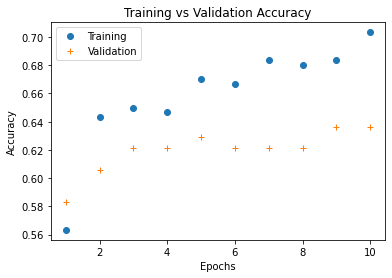

In [69]:
plt.plot(epochs, tra_acc, 'o', label='Training')
plt.plot(epochs, val_acc, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

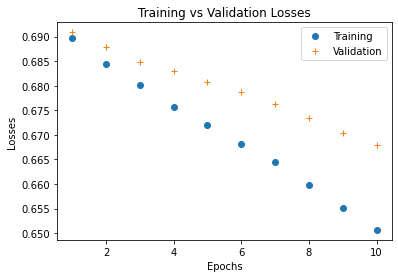

In [70]:
plt.plot(epochs, tra_loss, 'o', label='Training')
plt.plot(epochs, val_loss, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training vs Validation Losses')
plt.legend()
plt.show()

### <font color='Blue'>1.10 Extracting Predicted Probabilities for Each Label </font>

In [71]:
test_df = pd.DataFrame(test_targets)
test_df.columns =['A_mysql', 'A_python', 'A_php']
test_df

,A_mysql,A_python,A_php
0,1,0,1
1,0,0,1
2,1,1,0
3,1,0,1
4,1,0,1
5,1,1,0
6,0,0,1
7,1,1,0
8,1,1,0
9,0,0,1


In [72]:
pred_probs = model.predict(test_data)
pred_probs = pd.DataFrame(pred_probs)
pred_probs.columns =['Prob_mysql', 'Prob_python', 'Prob_php']
pred_probs

,Prob_mysql,Prob_python,Prob_php
0,0.549456,0.510577,0.516332
1,0.565907,0.505053,0.517269
2,0.566419,0.523571,0.503511
3,0.537307,0.489375,0.510366
4,0.574090,0.499257,0.518897
5,0.557969,0.504169,0.523135
6,0.571209,0.507977,0.502822
7,0.558685,0.510407,0.544359
8,0.560666,0.504339,0.505199
9,0.556582,0.508519,0.533039


In [73]:
y_pred_df = pd.concat([test_df, pred_probs], axis=1)
y_pred_df

,A_mysql,A_python,A_php,Prob_mysql,Prob_python,Prob_php
0,1,0,1,0.549456,0.510577,0.516332
1,0,0,1,0.565907,0.505053,0.517269
2,1,1,0,0.566419,0.523571,0.503511
3,1,0,1,0.537307,0.489375,0.510366
4,1,0,1,0.574090,0.499257,0.518897
5,1,1,0,0.557969,0.504169,0.523135
6,0,0,1,0.571209,0.507977,0.502822
7,1,1,0,0.558685,0.510407,0.544359
8,1,1,0,0.560666,0.504339,0.505199
9,0,0,1,0.556582,0.508519,0.533039


### <font color='Blue'>1.11 Classifier Performance </font>

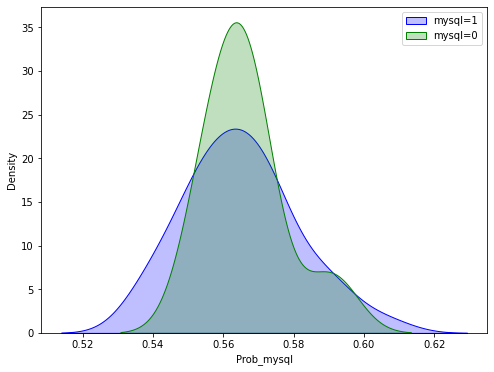

In [74]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.A_mysql == 1]["Prob_mysql"], color = 'b', shade=True,label = 'mysql=1' )
sn.kdeplot( y_pred_df[y_pred_df.A_mysql == 0]["Prob_mysql"], color = 'g', shade=True,label = 'mysql=0' )
plt.legend()
plt.show()

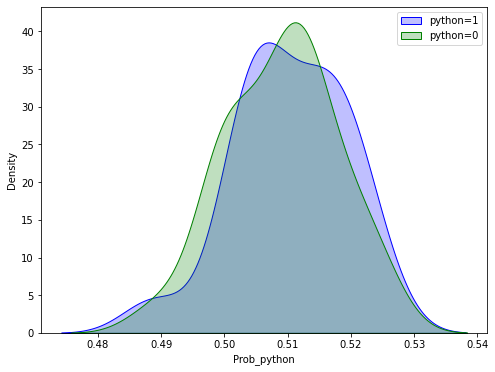

In [75]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.A_python == 1]["Prob_python"], color = 'b', shade=True,label = 'python=1' )
sn.kdeplot( y_pred_df[y_pred_df.A_python == 0]["Prob_python"], color = 'g', shade=True,label = 'python=0' )
plt.legend()
plt.show()

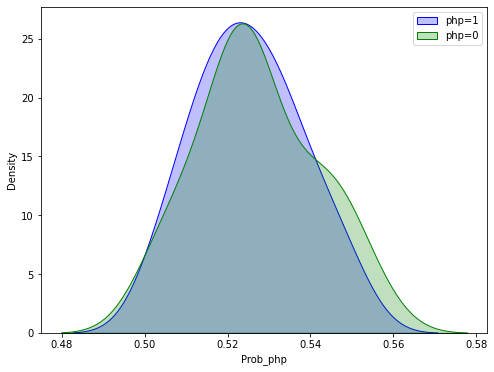

In [76]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.A_php== 1]["Prob_php"], color = 'b', shade=True,label = 'php=1' )
sn.kdeplot( y_pred_df[y_pred_df.A_php== 0]["Prob_php"], color = 'g', shade=True,label = 'php=0' )
plt.legend()
plt.show()

### <font color='Blue'>1.12 Performance Measures from Confusion Matrix </font>

#### <font color='Blue'>1.12 Get Predicted Labels Based on probability Distributions </font>

In [79]:
y_pred_df['Pred_mysql']   = y_pred_df.Prob_mysql.map(lambda x: 1 if x > 0.55 else 0)
y_pred_df['Pred_python'] = y_pred_df.Prob_python.map(lambda x: 1 if x > 0.45 else 0)
y_pred_df['Pred_php']    = y_pred_df.Prob_php.map(lambda x: 1 if x > 0.52 else 0)
y_pred_df          

,A_mysql,A_python,A_php,Prob_mysql,Prob_python,Prob_php,Pred_mysql,Pred_python,Pred_php
0,1,0,1,0.549456,0.510577,0.516332,0,1,0
1,0,0,1,0.565907,0.505053,0.517269,1,1,0
2,1,1,0,0.566419,0.523571,0.503511,1,1,0
3,1,0,1,0.537307,0.489375,0.510366,0,1,0
4,1,0,1,0.574090,0.499257,0.518897,1,1,0
5,1,1,0,0.557969,0.504169,0.523135,1,1,1
6,0,0,1,0.571209,0.507977,0.502822,1,1,0
7,1,1,0,0.558685,0.510407,0.544359,1,1,1
8,1,1,0,0.560666,0.504339,0.505199,1,1,0
9,0,0,1,0.556582,0.508519,0.533039,1,1,1


#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_0 </font>

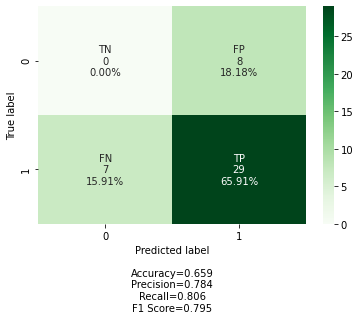

In [80]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.A_mysql, y_pred_df.Pred_mysql)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_1 </font>

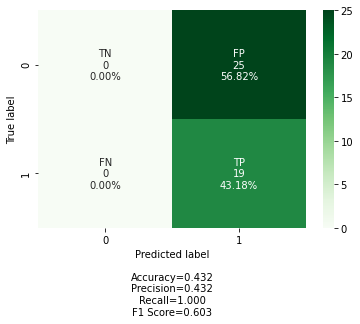

In [81]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.A_python, y_pred_df.Pred_python)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_2 </font>

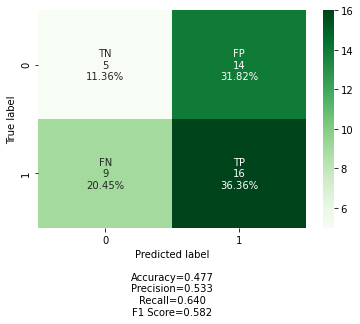

In [82]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.A_php, y_pred_df.Pred_php)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

### <font color='Blue'>Conclusion</font>

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.